# **Cloud Masking**

---



In [ ]:
import numpy as np
from osgeo import gdal
import os
#This code was created on Colab. Please add the corect folder path in which you have the input data.
# Folder path on Google Drive
folder_path = '/content/drive/MyDrive/Colab Notebooks/Flood Detection and Damage Assesment 2/Cloudmasking'

# Load the QA_PIXEL band from Google Drive folder
qa_path = os.path.join(folder_path, 'post_flood_QA_clipped.tif')
qa_ds = gdal.Open(qa_path)
qa_band = qa_ds.GetRasterBand(1).ReadAsArray()

# Create masks based on bitwise operations
# Mask for high-confidence clouds (Bit 3 set to 1)
high_conf_cloud_mask = (qa_band & (1 << 3)) == (1 << 3)

# Mask for medium or high confidence clouds (Bits 8-9 set to '10' or '11')
medium_high_conf_cloud_mask = (qa_band & (3 << 8)) >= (2 << 8)  # Checks if bits 8-9 are '10' (2) or '11' (3)

# Mask for high confidence cloud shadows (Bits 10-11 set to '11')
high_conf_cloud_shadow_mask = (qa_band & (3 << 10)) == (3 << 10)  # Checks if bits 10-11 are '11' (3)

# Combine masks: Keep pixels that are not clouds or cloud shadows
combined_mask = ~(high_conf_cloud_mask | medium_high_conf_cloud_mask | high_conf_cloud_shadow_mask)

# Function to apply mask to a given band and save to Google Drive folder
def apply_mask_to_band(band_filename, combined_mask, folder_path):
    band_path = os.path.join(folder_path, band_filename)
    band_ds = gdal.Open(band_path)
    band_data = band_ds.GetRasterBand(1).ReadAsArray()

    # Apply combined mask to band data
    masked_data = np.where(combined_mask, band_data, np.nan)  # Set masked areas to NaN

    # Save masked data to a new local file in Google Drive
    output_filename = band_filename.replace('.tif', '_masked_nan.TIF')
    output_path = os.path.join(folder_path, output_filename)

    driver = gdal.GetDriverByName('GTiff')
    out_ds = driver.Create(output_path, band_ds.RasterXSize, band_ds.RasterYSize, 1, gdal.GDT_Float32)  # Use Float32 for NaN support
    out_ds.SetGeoTransform(band_ds.GetGeoTransform())
    out_ds.SetProjection(band_ds.GetProjection())
    out_band = out_ds.GetRasterBand(1)
    out_band.WriteArray(masked_data)
    out_band.SetNoDataValue(np.nan)  # Explicitly set NoData value to NaN
    out_band.FlushCache()
    out_ds = None
    band_ds = None

    print(f"Masked band saved to {output_path}")

# List of band filenames to apply cloud mask
band_filenames = [
    'post_flood_B2_clipped.tif',
    'post_flood_B3_clipped.tif',
    'post_flood_B4_clipped.tif',
    'post_flood_B5_clipped.tif',
    'post_flood_B6_clipped.tif',
    'post_flood_B7_clipped.tif',
]

# Apply mask to each band and save to Google Drive folder
for band_filename in band_filenames:
    apply_mask_to_band(band_filename, combined_mask, folder_path)

print("Cloud masking completed and files saved to Google Drive folder.")


Masked band saved to /content/drive/MyDrive/Colab Notebooks/Flood Detection and Damage Assesment 2/Cloudmasking/post_flood_B2_clipped_masked_nan.TIF
Masked band saved to /content/drive/MyDrive/Colab Notebooks/Flood Detection and Damage Assesment 2/Cloudmasking/post_flood_B3_clipped_masked_nan.TIF
Masked band saved to /content/drive/MyDrive/Colab Notebooks/Flood Detection and Damage Assesment 2/Cloudmasking/post_flood_B4_clipped_masked_nan.TIF
Masked band saved to /content/drive/MyDrive/Colab Notebooks/Flood Detection and Damage Assesment 2/Cloudmasking/post_flood_B5_clipped_masked_nan.TIF
Masked band saved to /content/drive/MyDrive/Colab Notebooks/Flood Detection and Damage Assesment 2/Cloudmasking/post_flood_B6_clipped_masked_nan.TIF
Masked band saved to /content/drive/MyDrive/Colab Notebooks/Flood Detection and Damage Assesment 2/Cloudmasking/post_flood_B7_clipped_masked_nan.TIF
Cloud masking completed and files saved to Google Drive folder.


# Plot band before and after Cloud Masking

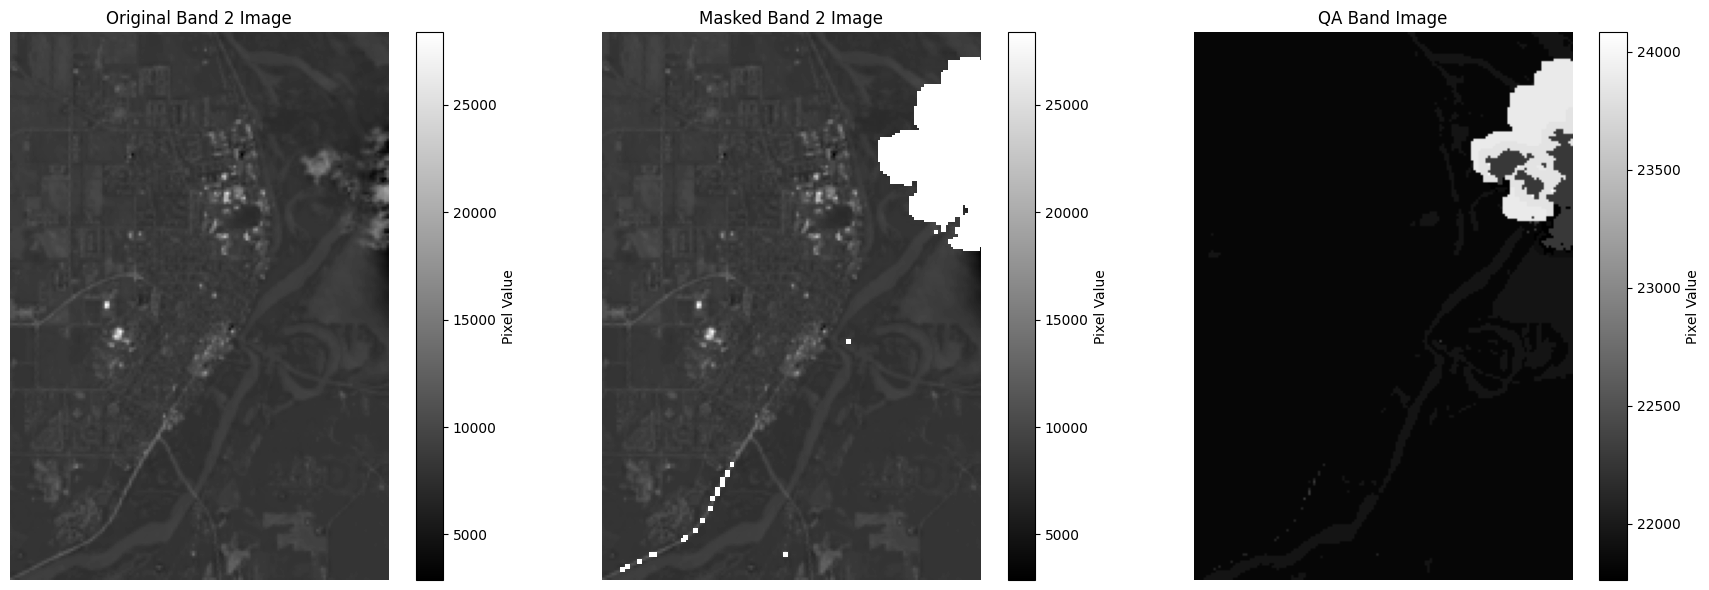

In [ ]:
import matplotlib.pyplot as plt
from osgeo import gdal
import os

def plot_all_images(folder_path, band_filename, qa_filename):
    """
    Plots the original band image, masked band image, and QA band image side by side.

    Parameters:
    - folder_path: str, path to the folder where band and QA files are stored.
    - band_filename: str, name of the band file to plot.
    - qa_filename: str, name of the QA band file to plot.
    """
     # Folder path on Google Drive
    folder_path = '/content/drive/MyDrive/Colab Notebooks/Flood Detection and Damage Assesment 2/Cloudmasking'
    # Load the original band data
    band_path = os.path.join(folder_path, band_filename)
    band_ds = gdal.Open(band_path)
    band_data = band_ds.GetRasterBand(1).ReadAsArray()

    # Load the masked band data
    masked_band_filename = band_filename.replace('.tif', '_masked_nan.TIF')
    masked_band_path = os.path.join(folder_path, masked_band_filename)
    masked_band_ds = gdal.Open(masked_band_path)
    masked_data = masked_band_ds.GetRasterBand(1).ReadAsArray()

    # Load the QA band data
    qa_path = os.path.join(folder_path, qa_filename)
    qa_ds = gdal.Open(qa_path)
    qa_data = qa_ds.GetRasterBand(1).ReadAsArray()

    # Plotting the images
    plt.figure(figsize=(18, 6))

    # Plot original band
    plt.subplot(1, 3, 1)
    plt.imshow(band_data, cmap='gray')
    plt.title('Original Band 2 Image')
    plt.colorbar(label='Pixel Value')
    plt.axis('off')  # Remove axis ticks and labels

    # Plot masked band
    plt.subplot(1, 3, 2)
    plt.imshow(masked_data, cmap='gray')
    plt.title('Masked Band 2 Image')
    plt.colorbar(label='Pixel Value')
    plt.axis('off')  # Remove axis ticks and labels

    # Plot QA band
    plt.subplot(1, 3, 3)
    plt.imshow(qa_data, cmap='gray')
    plt.title('QA Band Image')
    plt.colorbar(label='Pixel Value')
    plt.axis('off')  # Remove axis ticks and labels

    plt.tight_layout()
    plt.show()

# Example usage: Plot all three images side by side for Band 2 and QA band
plot_all_images(folder_path, 'post_flood_B2_clipped.tif', 'post_flood_QA_clipped.tif')



# Cloud Masking Band 8

In [ ]:
import numpy as np
from osgeo import gdal
import os

# Folder path on Google Drive
folder_path = '/content/drive/MyDrive/Colab Notebooks/Flood Detection and Damage Assesment 2/Cloudmasking'

# Load the QA_PIXEL band from Google Drive folder
qa_path = os.path.join(folder_path, 'post_flood_QA_clipped.tif')
qa_ds = gdal.Open(qa_path)
qa_band = qa_ds.GetRasterBand(1).ReadAsArray()

# Create masks based on bitwise operations
# Mask for high-confidence clouds (Bit 3 set to 1)
high_conf_cloud_mask = (qa_band & (1 << 3)) == (1 << 3)

# Mask for medium or high confidence clouds (Bits 8-9 set to '10' or '11')
medium_high_conf_cloud_mask = (qa_band & (3 << 8)) >= (2 << 8)  # Checks if bits 8-9 are '10' (2) or '11' (3)

# Mask for high confidence cloud shadows (Bits 10-11 set to '11')
high_conf_cloud_shadow_mask = (qa_band & (3 << 10)) == (3 << 10)  # Checks if bits 10-11 are '11' (3)

# Combine masks: Keep pixels that are not clouds or cloud shadows
combined_mask = ~(high_conf_cloud_mask | medium_high_conf_cloud_mask | high_conf_cloud_shadow_mask)

# Ensure combined mask is of the correct data type (0 or 1)
combined_mask = combined_mask.astype(np.uint8)

# Save combined mask to a temporary file to be used by GDAL
temp_mask_path = os.path.join(folder_path, 'temp_combined_mask.tif')
driver = gdal.GetDriverByName('GTiff')
mask_ds = driver.Create(temp_mask_path, qa_ds.RasterXSize, qa_ds.RasterYSize, 1, gdal.GDT_Byte)
mask_ds.GetRasterBand(1).WriteArray(combined_mask)
mask_ds.SetGeoTransform(qa_ds.GetGeoTransform())
mask_ds.SetProjection(qa_ds.GetProjection())
mask_ds.FlushCache()
mask_ds = None

# Resample the mask using gdal.Warp to match Band 8's resolution and extent
def resample_mask_to_match_band(band_filename, temp_mask_path, folder_path, output_resampled_mask_path):
    band_path = os.path.join(folder_path, band_filename)
    band_ds = gdal.Open(band_path)

    # Use gdal.Warp to resample the mask to match Band 8's resolution and extent
    gdal.Warp(
        output_resampled_mask_path,
        temp_mask_path,
        format='GTiff',
        width=band_ds.RasterXSize,
        height=band_ds.RasterYSize,
        resampleAlg='near',  # Nearest neighbor to maintain mask integrity
        outputBounds=[band_ds.GetGeoTransform()[0],
                      band_ds.GetGeoTransform()[3] + band_ds.RasterYSize * band_ds.GetGeoTransform()[5],
                      band_ds.GetGeoTransform()[0] + band_ds.RasterXSize * band_ds.GetGeoTransform()[1],
                      band_ds.GetGeoTransform()[3]],
        dstSRS=band_ds.GetProjection(),
        dstNodata=0
    )

    band_ds = None

# Resample combined mask to match Band 8
output_resampled_mask_path = os.path.join(folder_path, 'combined_mask_resampled_to_B8.tif')
resample_mask_to_match_band('post_flood_B8_clipped.tif', temp_mask_path, folder_path, output_resampled_mask_path)

# Load the resampled mask
resampled_mask_ds = gdal.Open(output_resampled_mask_path)
combined_mask_resampled = resampled_mask_ds.GetRasterBand(1).ReadAsArray()

# Function to apply mask to a given band and save to Google Drive folder
def apply_mask_to_band(band_filename, combined_mask, folder_path):
    band_path = os.path.join(folder_path, band_filename)
    band_ds = gdal.Open(band_path)
    band_data = band_ds.GetRasterBand(1).ReadAsArray()

    # Check if the shapes match, and if not, raise an error
    if band_data.shape != combined_mask.shape:
        raise ValueError("Resampled mask and band data have mismatched dimensions.")

    # Apply combined mask to band data
    masked_data = np.where(combined_mask == 1, band_data, np.nan)  # Keep data where mask is 1, set others to NaN

    # Save masked data to a new local file in Google Drive
    output_filename = band_filename.replace('.tif', '_masked_nan.TIF')
    output_path = os.path.join(folder_path, output_filename)

    driver = gdal.GetDriverByName('GTiff')
    out_ds = driver.Create(output_path, band_ds.RasterXSize, band_ds.RasterYSize, 1, gdal.GDT_Float32)
    out_ds.SetGeoTransform(band_ds.GetGeoTransform())
    out_ds.SetProjection(band_ds.GetProjection())
    out_ds.GetRasterBand(1).WriteArray(masked_data)
    out_ds.GetRasterBand(1).SetNoDataValue(np.nan)
    out_ds.FlushCache()
    out_ds = None
    band_ds = None

    print(f"Masked band saved to {output_path}")

# Cloud mask only band 8
band_filename = 'post_flood_B8_clipped.tif'

# Apply mask to band 8 and save to Google Drive folder
apply_mask_to_band(band_filename, combined_mask_resampled, folder_path)

print("Cloud masking for Band 8 completed and file saved to Google Drive folder.")

# Clean up temporary mask
os.remove(temp_mask_path)




Masked band saved to /content/drive/MyDrive/Colab Notebooks/Flood Detection and Damage Assesment 2/Cloudmasking/post_flood_B8_clipped_masked_nan.TIF
Cloud masking for Band 8 completed and file saved to Google Drive folder.
